## Take-home exam 1. Handling data from a JSON-based API

student: Dongdong Zhu<br>
student ID: 13523171

In [16]:
#import packages to retrieve data from the API
import requests
import sys
import optparse


#import packages to do data analysis
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

### Part 1. Data Retrieval

This part aims to retrieve data from the Schiphol PublicFlight API, and only one endpoint, flight, was used. Codes in the Schiphol API documentation under ”Quickstarts” were adapted to gain the flight data on January 1st, 2024. Due to the usage limit, the time range was set from 00:00:00 to 11:59:59.
Finally, a dataset of 1822 rows x 35 columns was obtained, serving as the dataset for this project.

In [2]:
#define the function to obtain data from the API
#hardcode the application ID and key
def callPublicFlightAPI(options):
    
    headers = {
      'accept': 'application/json',
      'resourceversion': 'v4',
      'app_id': 'cf45934a',
      'app_key': '988de20a7edb9beb43ae1a71d4a25dd5'
    }

    #create a loop to collect multiple pages of data based on the url
    allflights = []
    i = 0
    
    while True:
        url = (f"https://api.schiphol.nl/public-flights/"
        f"flights?includedelays=false&page={i}&sort=%2BscheduleTime"
        f"&fromDateTime=2024-01-01T00:00:00&toDateTime=2024-01-01T11:59:59")

        try:
            response = requests.request('GET', url, headers = headers)
        except requests.exceptions.ConnectionError as error:
            print(error)
            sys.exit()
            
        #if the correct code was returned, obtain data and extend it to the list
        if response.status_code == 200:
            flightList = response.json()['flights']
            allflights.extend(flightList)
            
            #when there is no 'rel="last"' in the link of response header, break the loop
            responseheader = response.headers.get('link', None)
            if 'rel="last"' not in responseheader:
                break
        
        #if the code was not returned, print the warning and response code
        else:
            print('''Oops something went wrong
Http response code: {}
{}'''.format(response.status_code, response.text))
            break
        
        #continue to loop the next page
        i += 1
    
    #if the list contains information, open a new json file to write the data and then close it, print a reminder
    #if the list is empty, print another reminder
    if allflights:
        with open("flightlist.json", mode = "w") as f:
            json.dump(allflights, f)
        print("All flights were saved to flightlist.json.")
    else:
        print("No flights were found.")

#call the function
if __name__ == '__main__':
    parser = optparse.OptionParser()
    parser.add_option('-i', '--app_id', dest='app_id',
                      help = 'App id used to call the API')
    parser.add_option('-k', '--app_key', dest='app_key',
                      help ='App key used to call the API')

    (options, args) = parser.parse_args(['-i', 'cf45934a', '-k', '988de20a7edb9beb43ae1a71d4a25dd5'])
    if options.app_id is None:
        parser.error('Please provide an app id (-i, --app_id)')

    if options.app_key is None:
        parser.error('Please provide an app key (-k, --app_key)')

    callPublicFlightAPI(options)


All flights were saved to flightlist.json.


In [17]:
#read the json file and display the first five rows
df = pd.read_json("flightlist.json")
df.head()

,lastUpdatedAt,actualLandingTime,aircraftType,baggageClaim,codeshares,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,...,aircraftRegistration,checkinAllocations,expectedSecurityFilter,gate,pier,publicEstimatedOffBlockTime,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,transferPositions
0,2024-01-01T01:56:38.364+01:00,2023-12-31T23:40:42.000+01:00,"{'iataMain': '737', 'iataSub': '73H'}",{'belts': ['16']},{'codeshares': ['KL2626']},2023-12-31T23:40:21.000+01:00,2024-01-01T00:20:53.222+01:00,A,HV5754,5754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:56:38.364+01:00,2023-12-31T23:40:42.000+01:00,"{'iataMain': '737', 'iataSub': '73H'}",{'belts': ['16']},{'codeshares': ['KL2626']},2023-12-31T23:40:21.000+01:00,2024-01-01T00:20:53.222+01:00,A,KL2626,2626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T01:29:47.169+01:00,2023-12-31T23:56:02.000+01:00,"{'iataMain': '737', 'iataSub': '73H'}",{'belts': ['2']},{'codeshares': ['KL2596']},2023-12-31T23:55:51.000+01:00,2024-01-01T00:27:28.000+01:00,A,HV5810,5810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T01:29:47.169+01:00,2023-12-31T23:56:02.000+01:00,"{'iataMain': '737', 'iataSub': '73H'}",{'belts': ['2']},{'codeshares': ['KL2596']},2023-12-31T23:55:51.000+01:00,2024-01-01T00:27:28.000+01:00,A,KL2596,2596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T01:56:37.956+01:00,2023-12-31T23:36:43.000+01:00,"{'iataMain': '737', 'iataSub': '73H'}",{'belts': ['4']},{'codeshares': ['KL2579']},2023-12-31T23:36:45.000+01:00,2024-01-01T00:13:41.236+01:00,A,HV6334,6334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#check the shape of this dataframe
df.shape

(1822, 35)

### Part 2. Data Analysis and Visualization

In this part, a number of key features were selected from the original dataset and utized for analysis. The following research questions are proposed:<br>
R1: What is the relationship between the terminals and directions of the flights?<br>
R2: What is the relationship between the schedule time and directions of the flights?<br>
A Chi-square test and an one-way ANOVA test were conducted to analyze the relationships. Then, data visualizations were conducted to display the distribution of those variables.

In [19]:
#display the column names
df.columns

Index(['lastUpdatedAt', 'actualLandingTime', 'aircraftType', 'baggageClaim',
       'codeshares', 'estimatedLandingTime', 'expectedTimeOnBelt',
       'flightDirection', 'flightName', 'flightNumber', 'id',
       'isOperationalFlight', 'mainFlight', 'prefixIATA', 'prefixICAO',
       'airlineCode', 'publicFlightState', 'route', 'scheduleDateTime',
       'scheduleDate', 'scheduleTime', 'serviceType', 'terminal',
       'schemaVersion', 'actualOffBlockTime', 'aircraftRegistration',
       'checkinAllocations', 'expectedSecurityFilter', 'gate', 'pier',
       'publicEstimatedOffBlockTime', 'expectedTimeBoarding',
       'expectedTimeGateClosing', 'expectedTimeGateOpen', 'transferPositions'],
      dtype='object')

In [20]:
#select the features to do data analysis
selected_columns = ["flightName", "flightNumber", "scheduleDate", 
                    "scheduleTime", "terminal", "flightDirection"]
df = df.loc[:, selected_columns]
df.head()

,flightName,flightNumber,scheduleDate,scheduleTime,terminal,flightDirection
0,HV5754,5754,2024-01-01,00:00:00,3.0,A
1,KL2626,2626,2024-01-01,00:00:00,3.0,A
2,HV5810,5810,2024-01-01,00:05:00,1.0,A
3,KL2596,2596,2024-01-01,00:05:00,1.0,A
4,HV6334,6334,2024-01-01,00:05:00,1.0,A


#### 2.1 Association between the terminals and directions of flights

In [21]:
#count the values of flightDirection
df["flightDirection"].value_counts()

A    999
D    823
Name: flightDirection, dtype: int64

In [22]:
#count the values of terminal
df["terminal"].value_counts()

2.0    951
1.0    568
3.0    206
4.0     44
Name: terminal, dtype: int64

In [23]:
#conduct the Chi-square test and report the result
observed_terminal = pd.crosstab(df["terminal"], df["flightDirection"])
stat,p,dof,expected = chi2_contingency(observed_terminal)
n = df.shape[0]
p = round(p, 3)
alpha = 0.05

print("Chi-square statistic result:", stat)
print("p-value:", p)
print("degree of freedom:", dof)
print("sample size:", n)

if p > alpha:
    print("H0 can be retained.")
else:
    print("H0 can be rejected.")

Chi-square statistic result: 723.4435923930534
p-value: 0.0
degree of freedom: 3
sample size: 1822
H0 can be rejected.


The null hypothesis is that there is no relationship between the terminals and directions of flights. A Chi-square test was performed to examine the relation, and the relationship is statistically significant, x<sup>2</sup> (3,1822) = 723.44, p < 0.01.<br>
Therefore, the null hypothesis can be rejected.

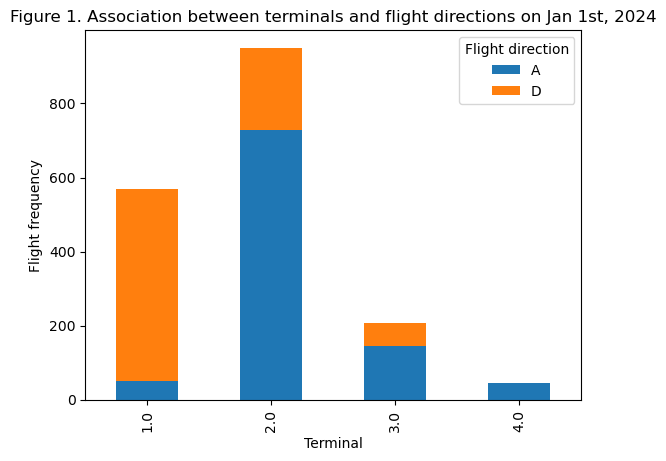

In [24]:
#visualize the relationship between the terminals and directions of flights
figure1 = observed_terminal.plot.bar(stacked = True)

plt.title("Figure 1. Association between terminals and flight directions on Jan 1st, 2024")
plt.xlabel("Terminal")
plt.ylabel("Flight frequency")
plt.legend(title = "Flight direction")


It can be observed that on January 1st, Terminal 4 was only for flights heading in direction A, while the majority of flights from Terminal 2 and 3 were also mainly for direction A. Terminal 1 was mainly used for flights heading in direction D.

#### 2.2 Association between the schedule time and directions of flights

In [25]:
#count the values of "scheduleTime"
df["scheduleTime"].value_counts()

08:35:00    72
08:40:00    66
08:15:00    65
08:25:00    61
11:35:00    58
            ..
01:25:00     1
06:10:00     1
00:40:00     1
01:40:00     1
05:40:00     1
Name: scheduleTime, Length: 86, dtype: int64

Due to the extensive counts of "scheduleTime", making calculations difficult, it was recoded into "flightHour" using a 12-hour range.

In [27]:
#convert the "scheduleTime" to datetime type
df["scheduleTime"] = pd.to_datetime(df["scheduleTime"], format="%H:%M:%S").dt.time

#create a new feature with a 12-hour format
df["flightHour"] = df["scheduleTime"].apply(lambda x: x.hour)

#calculate the frequencies of flights within each hour
df["flightfreq"] = df.groupby("flightHour")["flightName"].transform("count")

#calculate the frequecies of flights heading in different directions within each hour
df["directionA"] = df[df["flightDirection"] == "A"].groupby("flightHour")["flightDirection"].transform("count")
df["directionD"] = df[df["flightDirection"] == "D"].groupby("flightHour")["flightDirection"].transform("count")

#select relevant variables and reconstruct a dataframe with new index
variables = ["flightHour", "flightfreq", "directionA", "directionD"]
da = df.loc[:, variables].drop_duplicates().reset_index(drop = True)

#since there were no flights during a few hours, the value of flights in those hours was replced by 0
hour_range = pd.DataFrame({"flightHour": range(12)}) 
da = pd.merge(hour_range, da, on = "flightHour", how = "left")

#group the dataset by each hour and handle the values of direction A and D
da = da.groupby("flightHour", group_keys = False).apply(lambda x: x.ffill().bfill()).drop_duplicates()

#reset the index, and for those hours without flights, replace values by 0
da = da.reset_index(drop = True).fillna(0)
da

,flightHour,flightfreq,directionA,directionD
0,0,20.0,20.0,0.0
1,1,2.0,2.0,0.0
2,2,0.0,0.0,0.0
3,3,0.0,0.0,0.0
4,4,0.0,0.0,0.0
5,5,19.0,19.0,0.0
6,6,106.0,22.0,84.0
7,7,234.0,151.0,83.0
8,8,474.0,330.0,144.0
9,9,399.0,126.0,273.0


In [13]:
#create a new dataset by droping those hours without flights
dn = da.loc[da["flightfreq"] != 0]

#conduct levene test to check if the data fufill the assumptions for ANOVA test
args = [dn["flightHour"], dn["directionA"], dn["directionD"]]
w,p = stats.levene(*args)
if p < 0.05:
    print("The assumptions of ANOVA test was not met.")
else:
    print(f"p = {p}")

#conduct an one-way ANOVA test
f, pvalue = f_oneway(*args)
print("F = ", f)
print("p value = ", pvalue)

The assumptions of ANOVA test was not met.
F =  3.9866185301043338
p value =  0.03199599411733474


An one-way ANOVA test was performed to examine the relationship between the schedule time (unit: hour) and directions of flights. However, the assumption was not met, thus the ANOVA result is not appropriate. So data will only be analyzed by visulizations.

Text(0, 0.5, 'Flight Frequency')

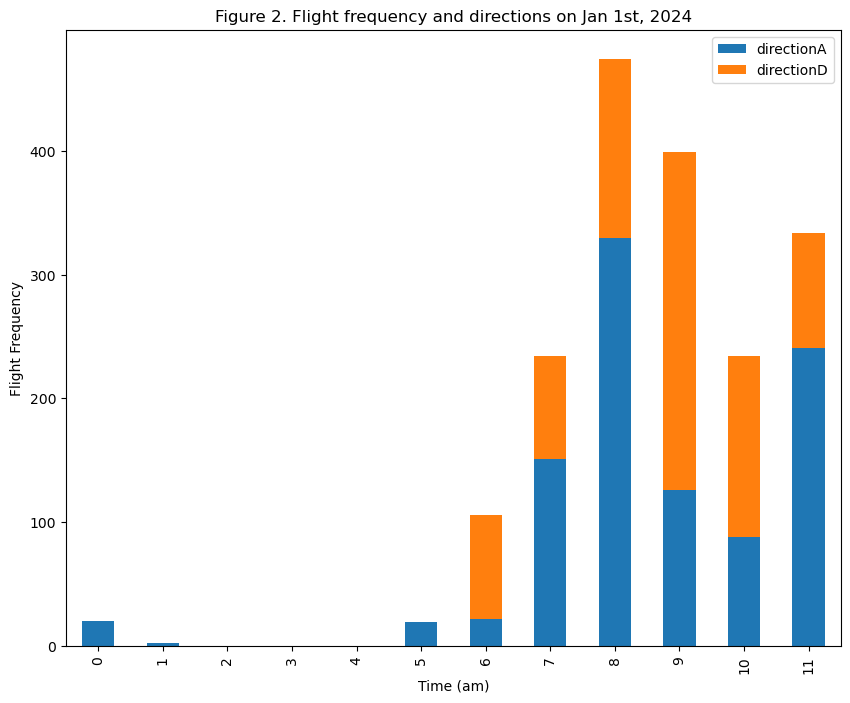

In [14]:
#visulize data by hour
figure2 = da.plot.bar(x = "flightHour", y = ["directionA", "directionD"],
            figsize = (10, 8), stacked = True)

plt.title("Figure 2. Flight frequency and directions on Jan 1st, 2024")
plt.xlabel("Time (am)")
plt.ylabel("Flight Frequency")

Based on the plot above, it can be observed that on January 1st 2024, most flights were scheduled between 6am and 12pm. Between 0 and 6am, there were only a few flights to direction A. From 6am, the quantity of flights to direction D increased and peaked between 9am and 10am. 

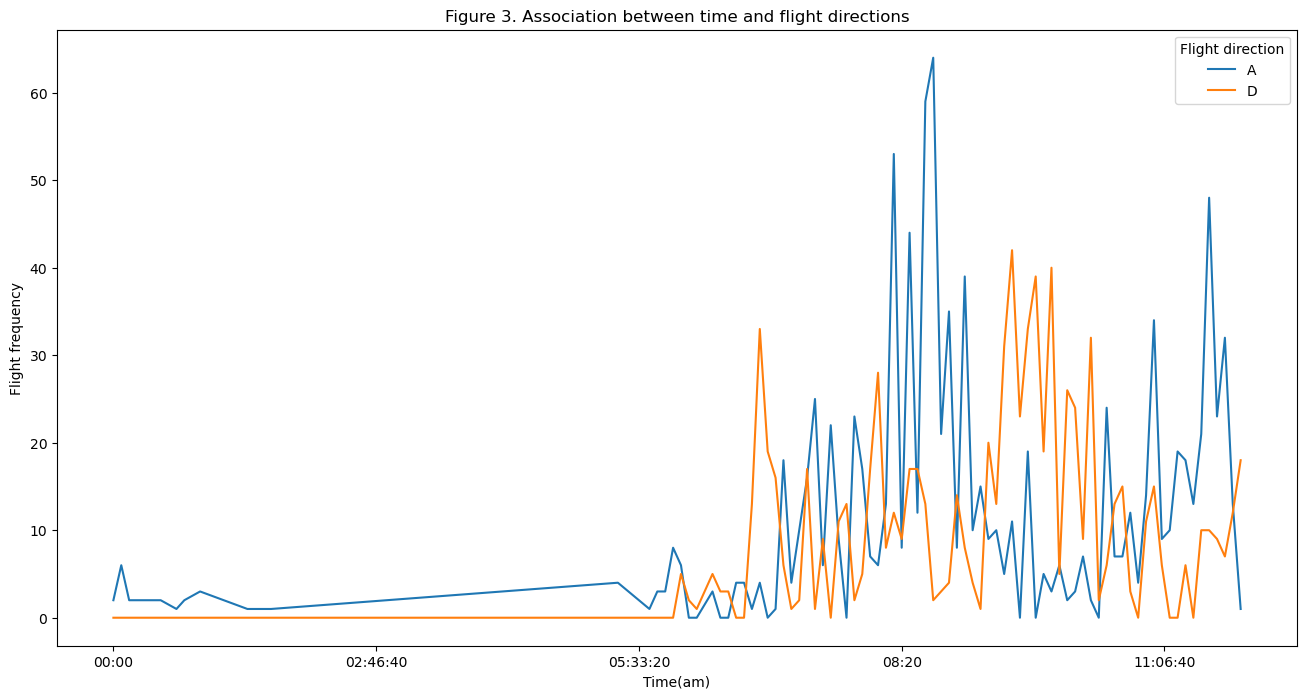

In [28]:
#visualize the data by minute
minute_flights = pd.crosstab(df["scheduleTime"], df["flightDirection"])
figure3 = minute_flights.plot.line(figsize = (16, 8))

plt.title("Figure 3. Association between time and flight directions")
plt.xlabel("Time(am)")
plt.ylabel("Flight frequency")
plt.legend(title = "Flight direction")

To dicuss in detail, a plot with a detailed schedule time was also created to compare the number of flights to different directions minute by minute. From this plot, it can be observed that on January 1st 2024, the peak number of flights to direction D occurs during 6am, 9am to 10am, while the peak number of flights to direction A is between 8:20am to 9am.

Overall, this project retrieved the data between 0am to 12pm on January 1st, 2024 from the Schiphol PublicFlight API and conducted some analysis to explore the relationship between the directions of the flights and their terminals and scheduled time. A statistically significant associatioin between the terminals and the directions of flights was revealed, while regarding the scheduled time, the assumptions for the ANOVA tests were mot met. However, certain patterns can still be observed from the visualizations.